In [9]:
from architecture import UNet
from dataset import ShoeDataset,hue_augmentation
from utils import train, eval
import torch 
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import os




In [10]:
image_dir = '..\\training_data'
image_folders_list = os.listdir(image_dir)
image_folders_list = list(map(lambda x: os.path.join(image_dir,x),image_folders_list))
image_folders_list

['..\\training_data\\adidas Golf', '..\\training_data\\adidas Originals']

In [11]:
dataset = ShoeDataset(image_folders_list)
print('Nr. of samples: ',len(dataset))

Nr. of samples:  152


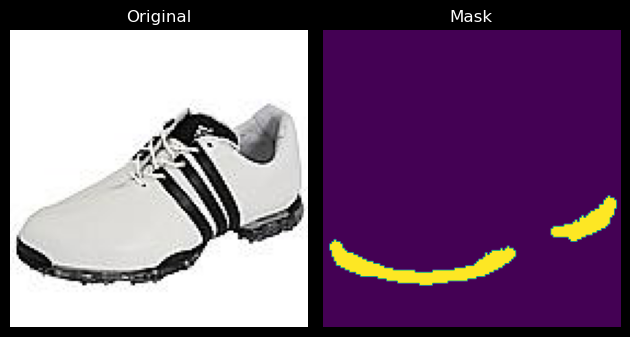

In [12]:
#View image and annotation
img,mask = dataset[1]
fig, axes = plt.subplots(1, 2)

# Display the images in the subplots
axes[0].imshow(img)
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(mask)
axes[1].set_title('Mask')
axes[1].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [13]:
augmented_data = hue_augmentation(dataset,scale= 5)
print('Nr of samples with augmentation: ',len(augmented_data))

Nr of samples with augmentation:  912


In [14]:
torch.manual_seed(66)
train_size = int(0.8 * len(augmented_data))
test_size = len(augmented_data) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(augmented_data, [train_size, test_size])

# Create data loaders for training and testing sets
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# Print the sizes of the train and test sets
print("Training set size:", len(train_dataset))
print("Testing set size:", len(test_dataset))

Training set size: 729
Testing set size: 183


In [16]:
#Train the model
model = UNet(3,1)# 3- input dim  1- output dim
trained_model = train(train_loader ,model,epochs = 1, lr = 0.001)

Epoch 1/1, Loss: 0.16530121539215573
Training finished!


In [17]:
#Evaluate your model
eval(model,test_loader)

Got 2885298/2998272 with accuracy 96.23 %
Dice score: 0.847967803478241


In [ ]:
#save your model
torch.save(model.state_dict(), 'your_own_model_weights.pth')